# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import numpy as np 
import os
from scipy.stats import sem

# For plotting we add addtional dependencies
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import seaborn as sns

In [38]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print (mouse_metadata.head())
print (study_results.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [39]:

# Combine the data into a single dataset
# Merge two dataframes using an inner join (using the common element 'customer_id')
# how=left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
# how=right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
# how=outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
# how=inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.
# how=cross: creates the cartesian product from both frames, preserves the order of the left keys.

# Merge inner
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

file_one = os.path.join('.','Output', 'Mouse_df.csv')
mouse_df.to_csv(file_one, index=False, header=True)                    # Writes out Mouse_df.cvs into the subdirectory "Output" 

# Display the data table for preview
mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [40]:
# Checking the number of mice.
numOfMice = len(mouse_df['Mouse ID'].unique())
numOfMice

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a data frame containing all the dublicate records
# Optional: Get all the data for the duplicate mouse ID. 
Dup_Mice_Rec = mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
Dup_Mice_Rec.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[mouse_df['Mouse ID']!= 'g989']
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [43]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_df['Mouse ID'].unique()))

248


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# mean 
mouse_mean = mouse_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
# median 
mouse_median = mouse_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
# variance
mouse_var = mouse_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'] 
# standard deviation
mouse_std = mouse_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
# SEM 
mouse_sem = mouse_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
mouse_tumor_stats_df = pd.DataFrame({
            'Tumor_mean': mouse_mean,
            'Tumor_median' : mouse_median,            
            'Tumor_var' : mouse_var,
            'Tumor_var' : mouse_std,
            'Tumor_sem' : mouse_sem})
mouse_tumor_stats_df.head(20)


,Tumor_mean,Tumor_median,Tumor_var,Tumor_sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_tumor_stats_df = mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
mouse_tumor_stats_df.head(20)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Treatments')

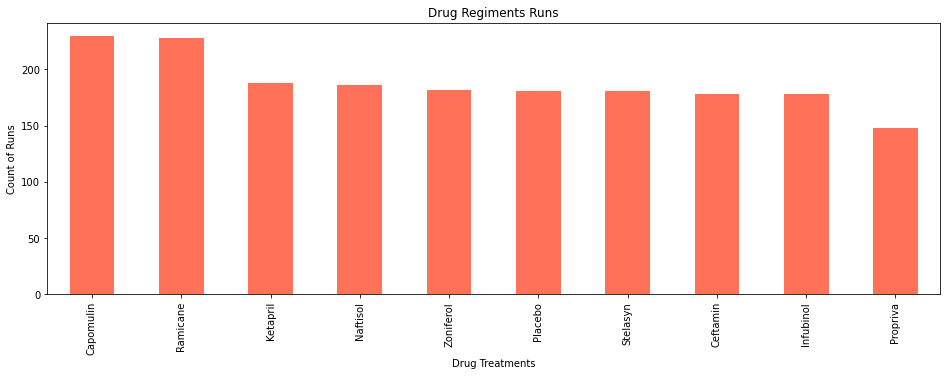

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
a = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
a =a.sort_values(ascending=False)
plt.title("Drug Regiments Runs")
a.plot(kind='bar', color='tomato', figsize=(16,5), alpha=0.9, align="center");
plt.ylabel("Count of Runs")
plt.xlabel("Drug Treatments")

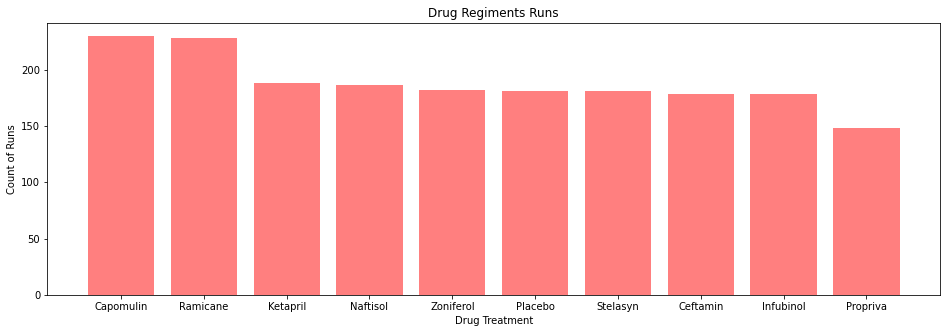

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis = mouse_df['Drug Regimen'].unique()
#y_axis = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values().tolist()
a = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
y_axis = a.tolist()
x_axis = a.index.tolist()
plt.figure(figsize=(16,5))
plt.title("Drug Regiments Runs")
plt.xlabel("Drug Treatment")
plt.ylabel("Count of Runs")
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center");

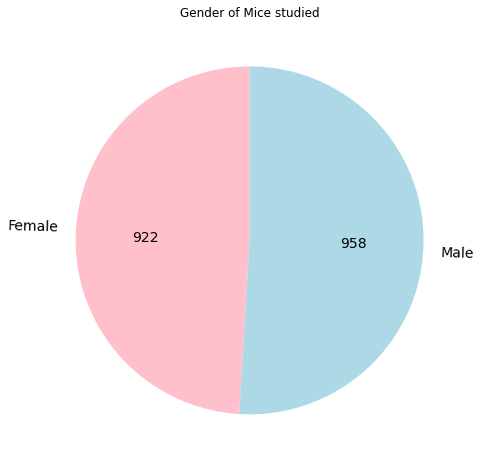

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_df.groupby(['Sex'])['Mouse ID'].count().plot(kind='pie', 
                                                figsize=(8,8),                                      #Set the figure size using the (x, y) tuple
                                                colors = ['pink','lightblue'],                      # Set the colors to pink and light blue
                                                title="Gender of Mice studied",                    # Add the title
                                                autopct=lambda x: '{:.0f}'.format(x*a.sum()/100),   # convert the % value back to a count value - The pie show the percent visually
                                                startangle=90,                                      # change the starting angle to straight up
                                                label='',                                           # Supress the vertical name title 'Mouse ID' on the left side
                                                rotatelabels = True,                                # slice label will be at the angel of the slice
                                                textprops={'fontsize': 14},                         # set the font size labels and ledgen                                                
                                                shadow = False);                                    # Don't have a shadow


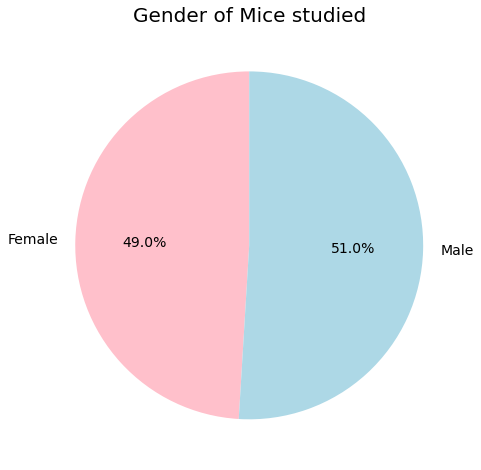

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
a = mouse_df.groupby(['Sex'])['Mouse ID'].count()
labels = a.index.tolist()                                                       # Set the pie slice labels
values = a.tolist()                                                             # Set size of the slices 
colors = ['pink','lightblue']                                                   # Set the colors for the slices
fig = plt.figure(figsize=(8,8))                                                 # Set the figure size
plt.title('Gender of Mice studied', fontsize = 20)
plt.pie(values, 
    labels=labels,
    colors=colors,
    autopct="%1.1f%%", 
    shadow=False,
    frame = False,
    textprops={'fontsize': 14},
    startangle=90);


## Quartiles, Outliers and Boxplots

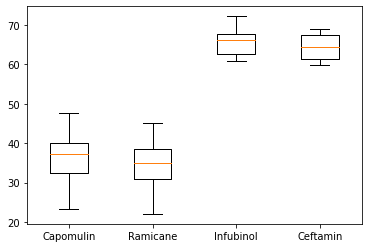

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df = mouse_df.loc[mouse_df['Mouse ID']!= 'g989']
mouse_df.head()
a = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') |
                 (mouse_df['Drug Regimen'] == 'Ramicane') |
                 (mouse_df['Drug Regimen'] == 'Infubinol') | 
                 (mouse_df['Drug Regimen'] == 'Ceftamin')]
b = mouse_df.loc[(mouse_df['Timepoint']==45)]
b
#c=mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]
#Capomulin = c['Tumor Volume (mm3)']

#c=mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]
Capomulin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ramicane_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ramicane') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Infubinol_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Infubinol') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ceftamin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ceftamin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
myDic= {'Capomulin':Capomulin_lst, 'Ramicane':Ramicane_lst, 'Infubinol':Infubinol_lst, 'Ceftamin':Ceftamin_lst}
fig, ax = plt.subplots()
ax.boxplot(myDic.values())
ax.set_xticklabels(myDic.keys());

In [62]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles = round(quartiles,2)
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)


print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
print(f"For Capomulin values below {lower_bound} could be outliers.")
print(f"For Capomulin values above {upper_bound} could be outliers.")
print ('----------------------')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ramicane') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles = round(quartiles,2)
lowerq =  round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
print(f"For Ramicane values below {lower_bound} could be outliers.")
print(f"For Ramicane values above {upper_bound} could be outliers.")
print ('----------------------')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Infubinol') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles = round(quartiles,2)
lowerq =  round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
print(f"For Infubinol values below {lower_bound} could be outliers.")
print(f"For Infubinol values above {upper_bound} could be outliers.")
print ('----------------------')


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ceftamin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles = round(quartiles,2)
lowerq =  round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")
print(f"For Ceftamin values below {lower_bound} could be outliers.")
print(f"For Ceftamin values above {upper_bound} could be outliers.")
print ('----------------------')


The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 37.31 
For Capomulin values below 20.71 could be outliers.
For Capomulin values above 51.83 could be outliers.
----------------------
The lower quartile of Ramicane is: 30.98
The upper quartile of Ramicane is: 38.51
The interquartile range of Ramicane is: 7.53
The the median of Ramicane is: 34.85 
For Ramicane values below 19.69 could be outliers.
For Ramicane values above 49.8 could be outliers.
----------------------
The lower quartile of Infubinol is: 62.75
The upper quartile of Infubinol is: 67.69
The interquartile range of Infubinol is: 4.94
The the median of Infubinol is: 66.08 
For Infubinol values below 55.34 could be outliers.
For Infubinol values above 75.1 could be outliers.
----------------------
The lower quartile of Ceftamin is: 61.43
The upper quartile of Ceftamin is: 67.53
The interquartile range of Ceftamin is

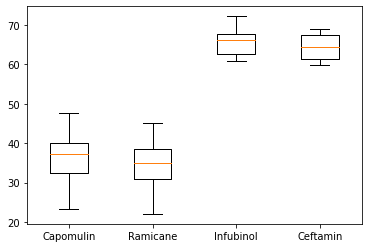

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ramicane_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ramicane') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Infubinol_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Infubinol') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()
Ceftamin_lst = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Ceftamin') & (mouse_df['Timepoint']==45)]['Tumor Volume (mm3)'].tolist()

myDic= {'Capomulin':Capomulin_lst, 'Ramicane':Ramicane_lst, 'Infubinol':Infubinol_lst, 'Ceftamin':Ceftamin_lst}
fig, ax = plt.subplots()
ax.boxplot(myDic.values())
ax.set_xticklabels(myDic.keys());    


In [50]:
mouse_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

## Line and Scatter Plots

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

